# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [18]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from datetime import datetime

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 597


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + 'appid=' + weather_api_key + '&q=' + city + '&units=metric'

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]
    
    # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})
        
    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | puerto san carlos
City not found. Skipping...
Processing Record 2 of Set 1 | pocone
Processing Record 3 of Set 1 | ilulissat
Processing Record 4 of Set 1 | iqaluit
Processing Record 5 of Set 1 | diu
Processing Record 6 of Set 1 | iskushuban
Processing Record 7 of Set 1 | haiku-pauwela
Processing Record 8 of Set 1 | ushuaia
Processing Record 9 of Set 1 | la'ie
Processing Record 10 of Set 1 | tazovsky
Processing Record 11 of Set 1 | lebu
Processing Record 12 of Set 1 | petropavlovsk-kamchatsky
Processing Record 13 of Set 1 | port-aux-francais
Processing Record 14 of Set 1 | flying fish cove
Processing Record 15 of Set 1 | fale old settlement
Processing Record 16 of Set 1 | klyuchi
Processing Record 17 of Set 1 | margaret river
Processing Record 18 of Set 1 | punta arenas
Processing Record 19 of Set 1 | kodiak
Processing Record 20 of Set 1 | ancud
Processing Record 21 of Set 1 | alice springs
Proces

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          575
Lat           575
Lng           575
Max Temp      575
Humidity      575
Cloudiness    575
Wind Speed    575
Country       575
Date          575
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,pocone,-16.2567,-56.6228,24.91,29,0,1.95,BR,1690940499
1,ilulissat,69.2167,-51.1000,6.01,100,100,2.06,GL,1690940327
2,iqaluit,63.7506,-68.5145,5.85,86,40,1.54,CA,1690940499
3,diu,20.7141,70.9822,26.96,84,100,7.47,IN,1690940500
4,iskushuban,10.2837,50.2300,28.50,41,100,8.72,SO,1690940500


In [8]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [11]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,pocone,-16.2567,-56.6228,24.91,29,0,1.95,BR,1690940499
1,ilulissat,69.2167,-51.1000,6.01,100,100,2.06,GL,1690940327
2,iqaluit,63.7506,-68.5145,5.85,86,40,1.54,CA,1690940499
3,diu,20.7141,70.9822,26.96,84,100,7.47,IN,1690940500
4,iskushuban,10.2837,50.2300,28.50,41,100,8.72,SO,1690940500


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

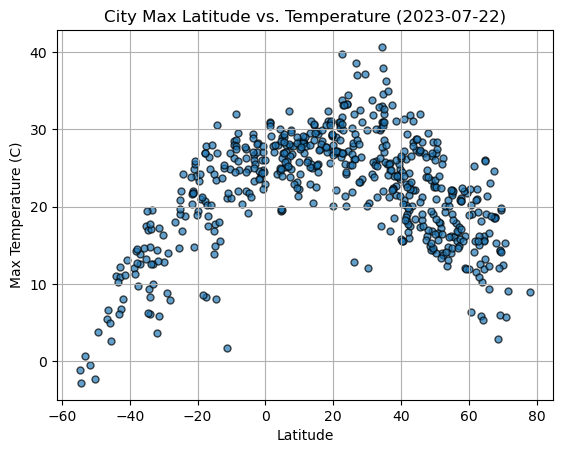

In [13]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], marker="o", s = 25, edgecolors="black", alpha=0.7)

# Incorporate the other graph properties
plt.title("City Max Latitude vs. Temperature (2023-07-22)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig1.png")

#### Latitude Vs. Humidity

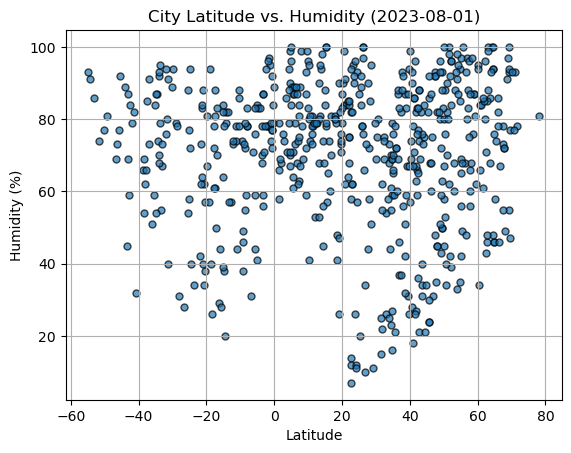

In [15]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], marker="o", s = 25, edgecolors="black", alpha=0.7)

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (2023-08-01)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)

plt.savefig("../output_data/Fig2.png")

#### Latitude Vs. Cloudiness

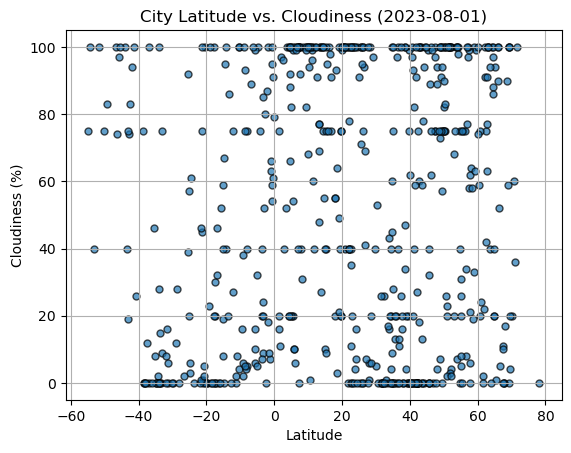

In [16]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], marker="o", s = 25, edgecolors="black", alpha=0.7)

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (2023-08-01)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)

plt.savefig("../output_data/Fig3.png")

#### Latitude vs. Wind Speed Plot

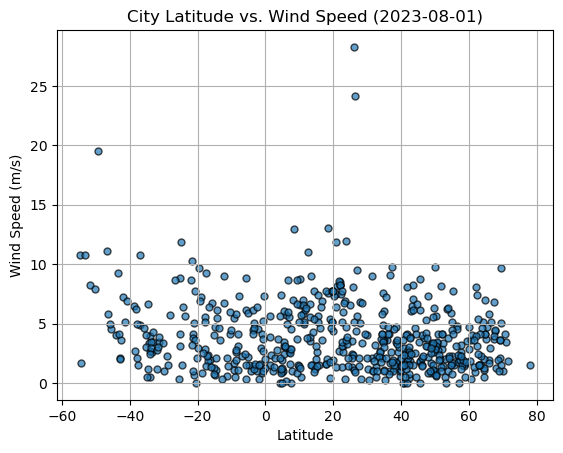

In [17]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], marker="o", s = 25, edgecolors="black", alpha=0.7)

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (2023-08-01)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.grid(True)

plt.savefig("../output_data/Fig4.png")

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [33]:
# Define a function to create Linear Regression plots

def lr_plot(x_value, y_value, x_label, y_label, hemisphere, text_coords, ylim=None):
    (slope, intercept, rvalue, pvalue, stederr) = linregress(x_value, y_value)

    regress_values = x_value * slope + intercept

    line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

    #Generate plots
    plt.scatter(x_value, y_value, edgecolor="black", linewidth=1, marker="o", alpha=0.8)
    plt.plot(x_value, regress_values, "r-")
    date_now = datetime.date(datetime.now())
    plt.title(f"{hemisphere} Hemisphere - {x_label} vs {y_label} {date_now}")
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    if ylim is not None:
       plt.ylim(0, ylim)
    plt.annotate(line_eq, text_coords, fontsize=10, color="red")
    
    # Print r square value
    print(f"The r value is: {rvalue}")

In [34]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"] >= 0]
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,ilulissat,69.2167,-51.1000,6.01,100,100,2.06,GL,1690940327
2,iqaluit,63.7506,-68.5145,5.85,86,40,1.54,CA,1690940499
3,diu,20.7141,70.9822,26.96,84,100,7.47,IN,1690940500
4,iskushuban,10.2837,50.2300,28.50,41,100,8.72,SO,1690940500
5,haiku-pauwela,20.9219,-156.3051,29.01,62,40,11.83,US,1690940500


In [35]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"] < 0]
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,pocone,-16.2567,-56.6228,24.91,29,0,1.95,BR,1690940499
6,ushuaia,-54.8000,-68.3000,-1.19,93,75,10.80,AR,1690940500
9,lebu,-37.6167,-73.6500,9.70,85,12,1.53,CL,1690940501
11,port-aux-francais,-49.3500,70.2167,3.79,81,83,19.50,TF,1690940502
12,flying fish cove,-10.4217,105.6791,24.82,88,100,4.12,CX,1690940502


###  Temperature vs. Latitude Linear Regression Plot

The r value is: -0.6381809834457356


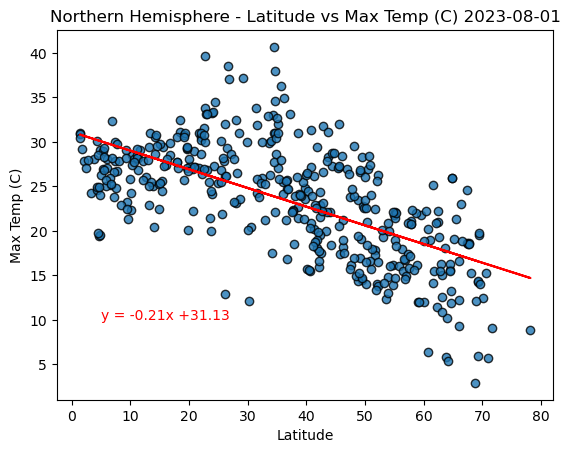

In [38]:
# Linear regression on Northern Hemisphere
x = northern_hemi_df["Lat"]
y = northern_hemi_df["Max Temp"]
lr_plot(x, y, "Latitude", "Max Temp (C)", "Northern", (5, 10))

# Save the figure
plt.savefig("../output_data/Fig5.png")

The r value is: 0.8162475853623443


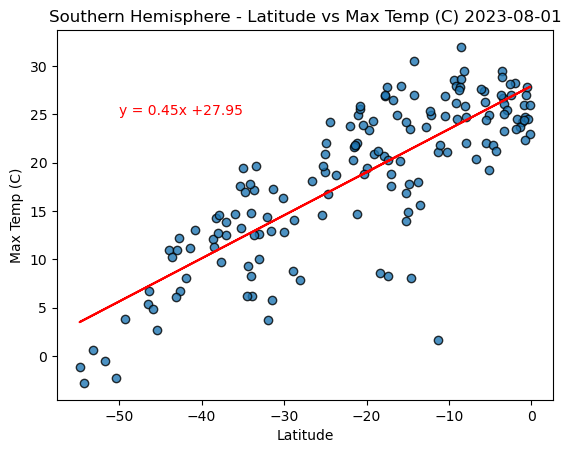

In [44]:
# Linear regression on Southern Hemisphere
x = southern_hemi_df["Lat"]
y = southern_hemi_df["Max Temp"]
lr_plot(x, y, "Latitude", "Max Temp (C)", "Southern", (-50, 25))

# Save the figure
plt.savefig("../output_data/Fig6.png")

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

The r value is: -0.02364493107833583


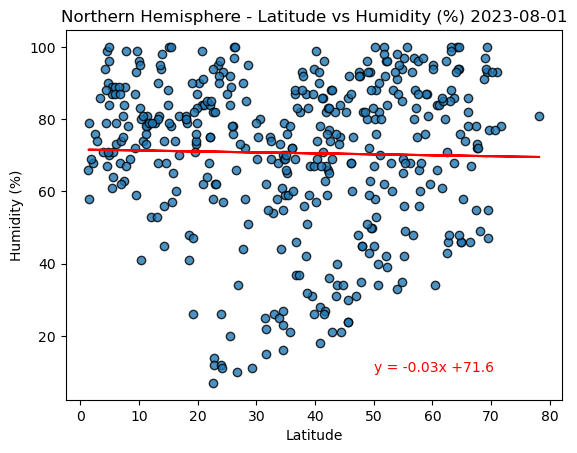

In [43]:
# Northern Hemisphere
x = northern_hemi_df["Lat"]
y = northern_hemi_df["Humidity"]
lr_plot(x, y, "Latitude", "Humidity (%)", "Northern", (50, 10))

# Save the figure
plt.savefig("../output_data/Fig7.png")

The r value is: -0.047807577506238264


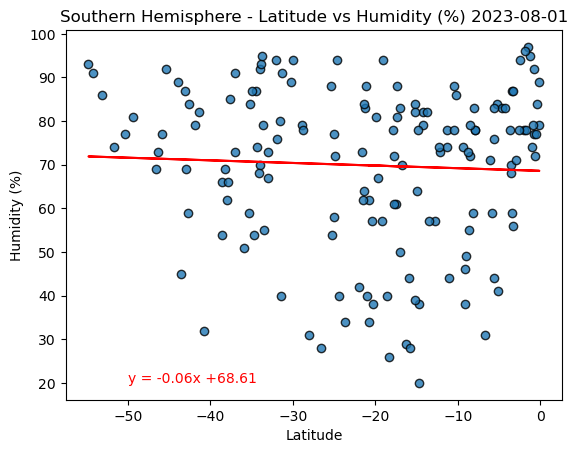

In [45]:
# Southern Hemisphere
x = southern_hemi_df["Lat"]
y = southern_hemi_df["Humidity"]
lr_plot(x, y, "Latitude", "Humidity (%)", "Southern", (-50, 20))

# Save the figure
plt.savefig("../output_data/Fig8.png")

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

The r value is: -0.11184593595073783


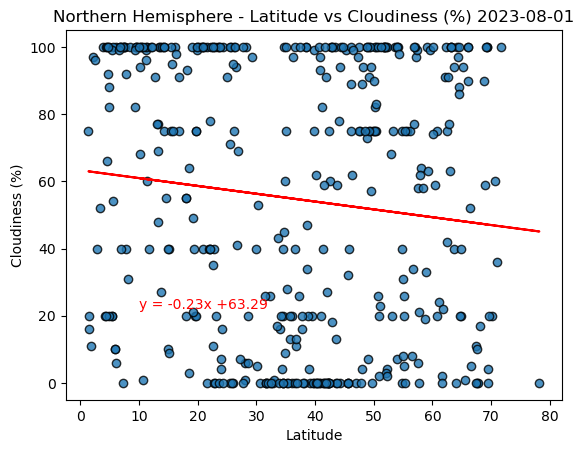

In [48]:
# Northern Hemisphere
x = northern_hemi_df["Lat"]
y = northern_hemi_df["Cloudiness"]
lr_plot(x, y, "Latitude", "Cloudiness (%)", "Northern", (10, 22))

# Save the figure
plt.savefig("../output_data/Fig9.png")

The r value is: -0.007587980797884571


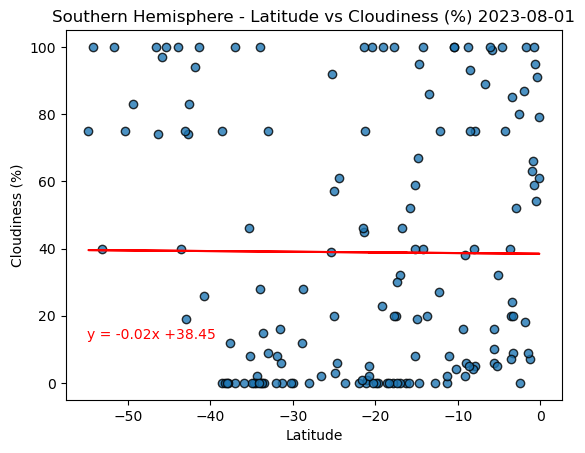

In [53]:
# Southern Hemisphere
x = southern_hemi_df["Lat"]
y = southern_hemi_df["Cloudiness"]
lr_plot(x, y, "Latitude", "Cloudiness (%)", "Southern", (-55, 13))

# Save the figure
plt.savefig("../output_data/Fig10.png")

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

The r value is: -0.1699833242772172


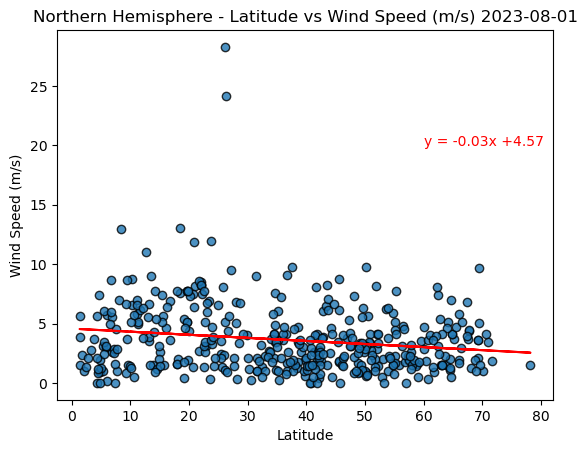

In [55]:
# Northern Hemisphere
x = northern_hemi_df["Lat"]
y = northern_hemi_df["Wind Speed"]
lr_plot(x, y, "Latitude", "Wind Speed (m/s)", "Northern", (60, 20))

# Save the figure
plt.savefig("../output_data/Fig11.png")

The r value is: -0.31084078099722584


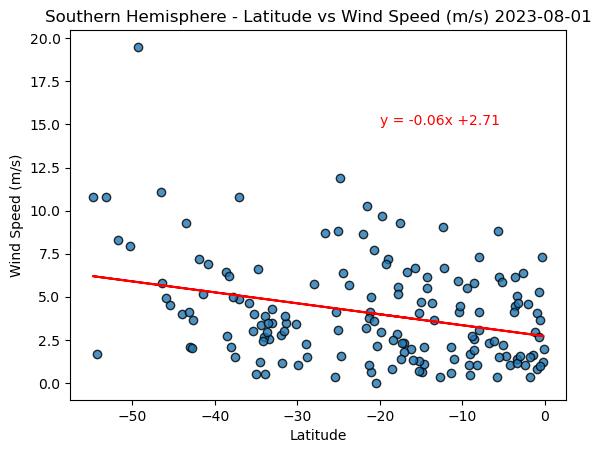

In [58]:
# Southern Hemisphere
x = southern_hemi_df["Lat"]
y = southern_hemi_df["Wind Speed"]
lr_plot(x, y, "Latitude", "Wind Speed (m/s)", "Southern", (-20, 15))

# Save the figure
plt.savefig("../output_data/Fig12.png")

**Discussion about the linear relationship:** YOUR RESPONSE HERE